In [1]:
# Imports
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import datetime
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn
import math
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('BITCOIN_PRICES_LAST_5_YEARS.csv', usecols=('Date', 'Close'))

In [4]:
df = df.rename(columns={'Date':'ts', 'Close': 'y'})
df.columns = df.columns.astype(str)
df = df.set_index(['ts'], drop=True)
df.index= pd.to_datetime(df.index)

In [5]:
raw_input_test = list(df['y'])
raw_input_test
np.shape(df.index)

(1825,)

In [6]:
df

,y
ts,
2017-07-03,2567.00000
2017-07-04,2602.27000
2017-07-05,2602.12000
2017-07-06,2610.60000
2017-07-07,2520.75000
...,...
2022-06-27,20732.98340
2022-06-28,20293.45080
2022-06-29,20101.12000


In [14]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = raw_input_test

# choose a number of time steps
n_steps_in, n_steps_out = 60, 30

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


# define model
model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=10, verbose=0)

In [19]:


# demonstrate prediction

x_input = array(raw_input_test[1765:1825])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)



[[16300.7    26983.592  23154.297  12978.201  19851.43    1189.233
  13886.74   -9040.138  -3169.3228  2188.9412 14169.812  10383.694
   4419.3413  8854.825  -9045.099  11290.499  10983.279  26274.064
   8172.3423  9097.819   9152.0205 15187.416  24107.332  20443.37
  -9500.688   5340.127  12676.728  27257.688  -2470.5515  2394.8523]]


In [20]:
x_list = list(range(1,1865))


y_hat1 = np.reshape(yhat, (30,1))
np.shape(y_hat1)



(30, 1)

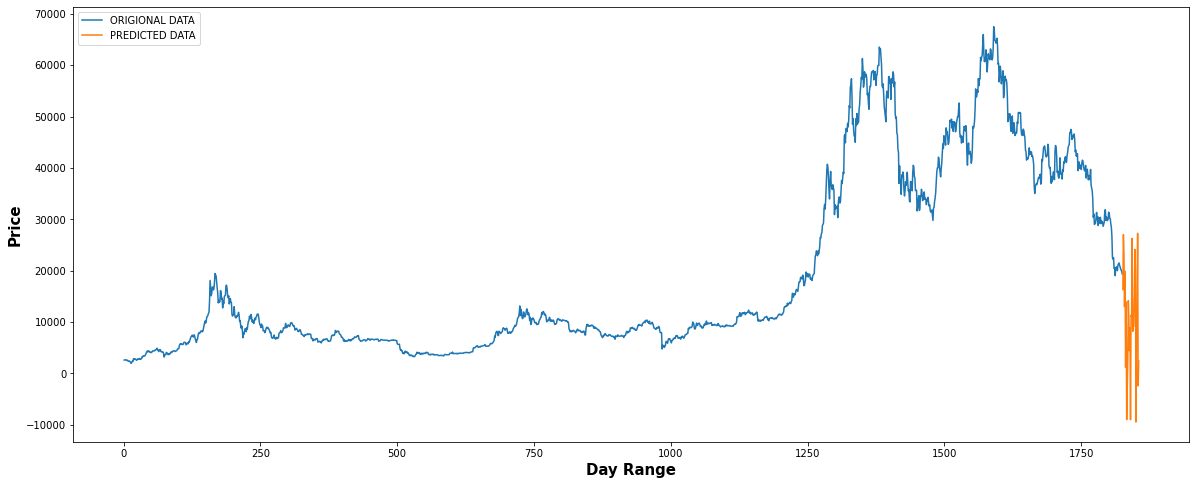

In [21]:
# plt.figure(figsize=(25,15))
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.plot(x_list[0:1825], df['y'][0:1825], label='ORIGIONAL DATA')

ax.plot(x_list[1825:1855], y_hat1, label='PREDICTED DATA')

ax.set_xlabel('Day Range', fontweight="bold", fontsize=15)
ax.set_ylabel("Price", fontweight="bold",  fontsize=15)
ax.legend( loc='upper left')


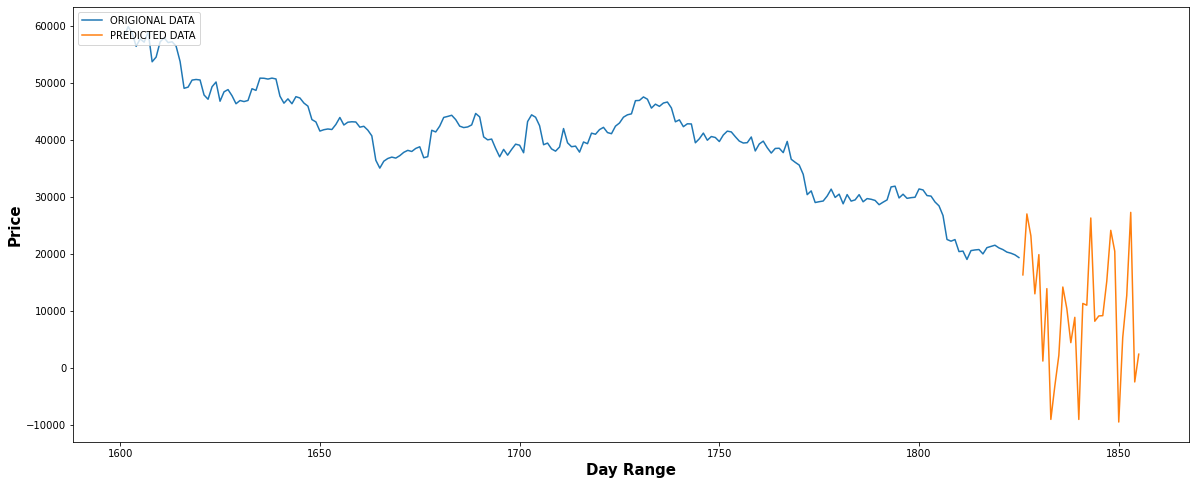

In [23]:
# plt.figure(figsize=(25,15))
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.plot(x_list[1600:1825], df['y'][1600:1825], label='ORIGIONAL DATA')

ax.plot(x_list[1825:1855], y_hat1, label='PREDICTED DATA')

ax.set_xlabel('Day Range', fontweight="bold", fontsize=15)
ax.set_ylabel("Price", fontweight="bold",  fontsize=15)
ax.legend( loc='upper left')
